## OPT Trout processing, differential contrast
* MAG 0.5, C mount.
* embedded in 1.5%, 2ECI
* FL with blue torch excitation, Transmissino with WL LED, 590nm LP detections
* 400 steps and undersampling

In [1]:
import sys
import os
from pathlib import Path
import gc
import psutil
from time import perf_counter

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets

from tqdm import tqdm
from scipy.ndimage import variance
from IPython.display import display

import tomopy as tom
from tomopy.recon.rotation import find_center_vo, find_center

import utils_opt as u
from napari_opt_handler.corrections import Correct
from data_loader import OptLoader

%load_ext autoreload
%autoreload 2

In [3]:
tr = np.load('data_output/0801_tr_lp590_400_recon.npy', allow_pickle=True)
fl = np.load('data_output/0801_fl_lp590_400_recon.npy', allow_pickle=True)

In [4]:
np.amax(tr), np.amin(tr), np.amax(fl), np.amin(fl)  

(np.int16(4096), np.int16(0), np.int16(4096), np.int16(0))

In [6]:
tr.shape == fl.shape
diff = tr - fl[:-1, :, :]
np.amax(diff), np.amin(diff)

(np.int16(4096), np.int16(-4076))

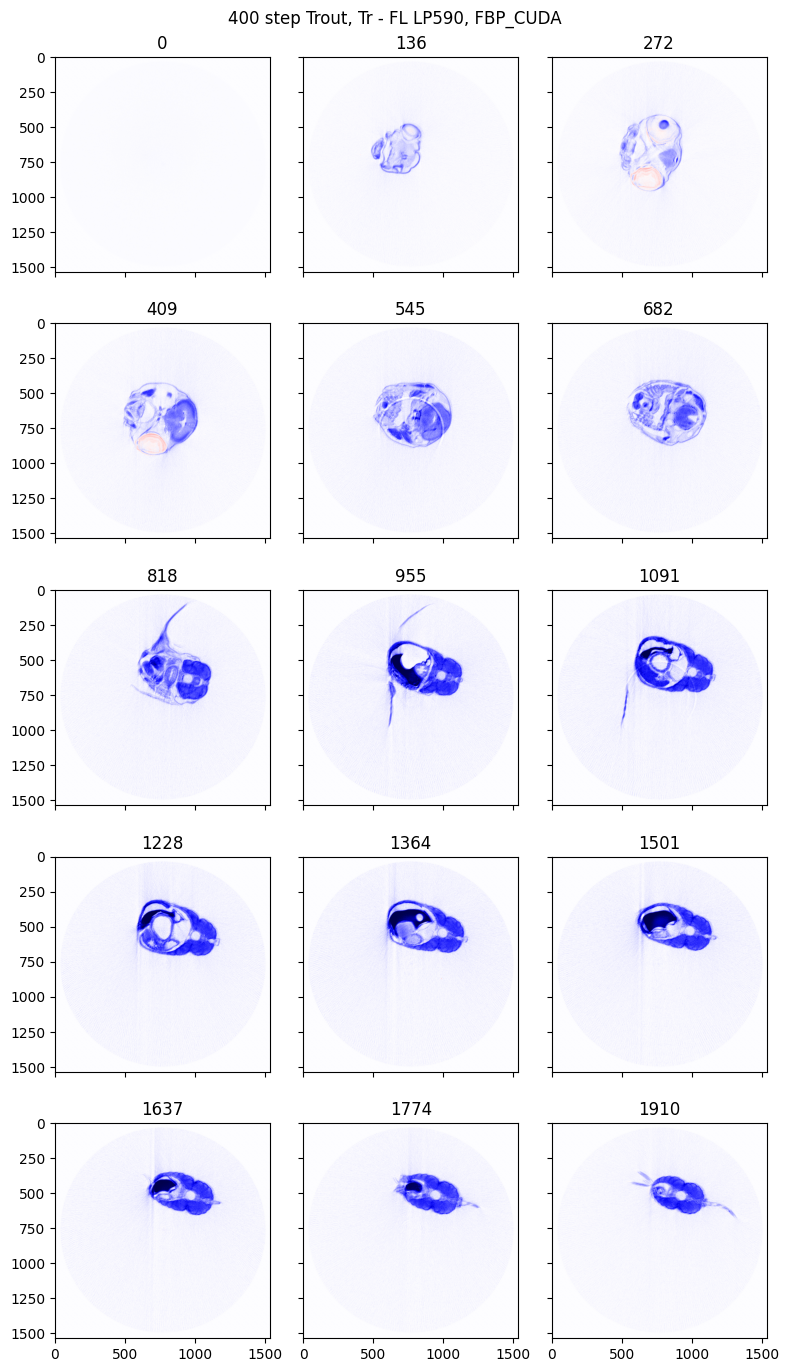

In [10]:
height = tr.shape[0]
cmax = np.amax(diff)
cmin = np.amin(diff)
sf = 2

fig, ax = plt.subplots(5, 3, figsize=(8, 14), sharex=True, sharey=True)
for i in range(len(tr)):
    try:
        ax[i//3, i%3].imshow(diff[int(height/15*i)],
                            #  cmap=plt.cm.Greys_r,
                             cmap=plt.cm.seismic,
                             vmin=cmin / sf, vmax=cmax / sf)
        # for the case of stride in rows and plotting everything
        # ax[i//3, i%3].imshow(full_recon[i], cmap=plt.cm.Greys_r)
        ax[i//3, i%3].set_title(int(height/15*i))
    except:
        pass
plt.suptitle('400 step Trout, Tr - FL LP590, FBP_CUDA')
plt.tight_layout()
plt.savefig('fig_output/0801_tr_fl_diff.png', dpi=180)
plt.show()